In [1]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt


mpmath.mp.dps = 5

load = np.genfromtxt('./sapphire-gold60nm_80K.txt',skip_header=2)
points80k = np.delete(load,1,1)

load = np.genfromtxt('./sapphire-gold60nm_300K.txt',skip_header=2)
points300k = np.delete(load,1,1)

#frequencies = points300k[:,0]
frequencies = [5e3,20e3,50e3,200e3,500e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6]

domain = Domain(80)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,3.3e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_80 = []
for f in frequencies:
  phases_80.append(model.get_phase(f))

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,3.3e3)
#domain.set_layer_param(1,kt=33.6,kp=33.6)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0e-4)

print(vars(domain.heat_path[0]))
print(vars(domain.heat_path[1]))
print(vars(domain.heat_path[2]))

phases_300 = []
for f in frequencies:
  phases_300.append(model.get_phase(f))

load = np.genfromtxt('./sapphire-gold60nm_80K.txt',skip_header=2)
points80k = np.delete(load,1,1)

load = np.genfromtxt('./sapphire-gold60nm_300K.txt',skip_header=2)
points300k = np.delete(load,1,1)

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_80);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_300);  # Plot some data on the axes.
ax.scatter(points80k[:,0],points80k[:,1])
ax.scatter(points300k[:,0],points300k[:,1])



{'thickness': 0.001, 'temperature': 80, 'material': <pyFDTR.materials.sapphire object at 0x7f10b44a8100>, 'cp': 0.09688563840000002, 'density': 3.97, 'kxx': 6.702924687620913, 'kyy': 6.702924687620913, 'kxy': 0, 'kzz': 6.702924687620913}
{'temperature': 80, 'materialname_1': 'Sapphire', 'materialname_2': 'Au', 'g': 3300.0}
{'thickness': 6e-06, 'temperature': 80, 'material': <pyFDTR.materials.gold object at 0x7f1070b6c220>, 'cp': 1.97792201038336, 'density': 19.3, 'kxx': 0.6839953648000001, 'kyy': 0.6839953648000001, 'kxy': 0, 'kzz': 0.6839953648000001}


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at /home/marcel/FDTR/pyFDTR/fouriermodel.py (26)[0m
[1m
File "pyFDTR/fouriermodel.py", line 26:[0m
[1m	def tointegrate(self, x):
[1m		return self.lfunction(x[0],x[1])
[0m  [1m^[0m[0m 

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'pyFDTR.fouriermodel.FourierModelFDTR'>[0m


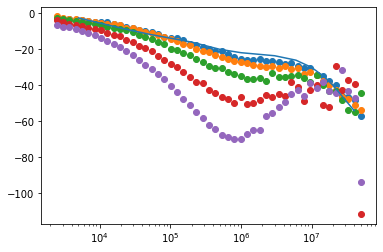

In [8]:


load = np.genfromtxt('./subs_00um.txt',skip_header=2)
points00um = np.delete(load,1,1)
load = np.genfromtxt('./subs_01um.txt',skip_header=2)
points01um = np.delete(load,1,1)
load = np.genfromtxt('./subs_03um.txt',skip_header=2)
points03um = np.delete(load,1,1)
load = np.genfromtxt('./subs_05um.txt',skip_header=2)
points05um = np.delete(load,1,1)
load = np.genfromtxt('./subs_07um.txt',skip_header=2)
points07um = np.delete(load,1,1)
load = np.genfromtxt('./subs_10um.txt',skip_header=2)
points10um = np.delete(load,1,1)

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_300);  # Plot some data on the axes.
ax.scatter(points00um[:,0],points00um[:,1])
ax.scatter(points01um[:,0],points01um[:,1])
ax.scatter(points03um[:,0],points03um[:,1])
ax.scatter(points05um[:,0],points05um[:,1])
#ax.scatter(points07um[:,0],points07um[:,1]+180)
ax.scatter(points10um[:,0],points10um[:,1])

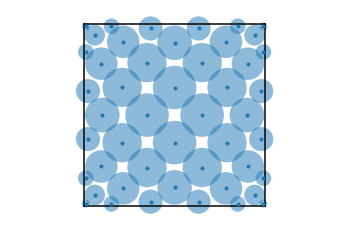

[[ 0.79809899  0.30385303 -0.79809899 -0.30385303  0.          0.
   0.          0.          0.88242227  0.9777898  -0.88242227 -0.9777898
   0.88242227  0.9777898  -0.88242227 -0.9777898   0.80871214  0.3046548
   0.98050484  0.26484416 -0.80871214 -0.3046548  -0.98050484 -0.26484416
   0.80871214  0.3046548   0.98050484  0.26484416 -0.80871214 -0.3046548
  -0.98050484 -0.26484416  0.56721357  0.57873619  0.69746363  0.95574252
  -0.56721357 -0.57873619 -0.69746363 -0.95574252  0.56721357  0.57873619
   0.69746363  0.95574252 -0.56721357 -0.57873619 -0.69746363 -0.95574252]
 [ 0.          0.          0.          0.          0.79809899  0.30385303
  -0.79809899 -0.30385303  0.88242227  0.9777898   0.88242227  0.9777898
  -0.88242227 -0.9777898  -0.88242227 -0.9777898   0.56721357  0.57873619
   0.69746363  0.95574252  0.56721357  0.57873619  0.69746363  0.95574252
  -0.56721357 -0.57873619 -0.69746363 -0.95574252 -0.56721357 -0.57873619
  -0.69746363 -0.95574252  0.80871214  0.3046548 

In [7]:
scheme = quadpy.c2._witherden_vincent.witherden_vincent_15()
#scheme = quadpy.c2.get_good_scheme(28)
scheme.show()
print(scheme.points)
print(scheme.weights)
print(scheme.degree)
print(scheme.source)
print(scheme.test_tolerance)

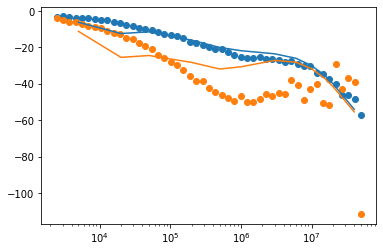

In [3]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

mpmath.mp.dps = 5

load = np.genfromtxt('./subs_00um.txt',skip_header=2)
points00um = np.delete(load,1,1)

load = np.genfromtxt('./subs_05um.txt',skip_header=2)
points05um = np.delete(load,1,1)

#frequencies = points00um[:,0]
frequencies = [5e3,20e3,50e3,200e3,500e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6]

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,3.3e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0e-4)

phases_00 = []
for f in frequencies:
  phases_00.append(model.get_phase(f))

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,3.3e3)
#domain.set_layer_param(1,kt=33.6,kp=33.6)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,5e-4)


phases_10 = []
for f in frequencies:
  phases_10.append(model.get_phase(f))


fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_00);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_10);  # Plot some data on the axes.
ax.scatter(points00um[:,0],points00um[:,1])
ax.scatter(points05um[:,0],points05um[:,1])


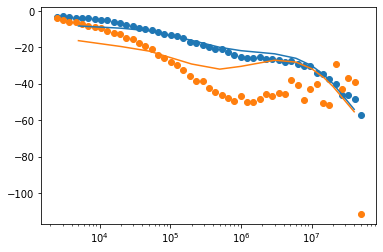

In [1]:
import numpy as np
import mpmath
from pyFDTR.domain import *
from pyFDTR.materials import *
from pyFDTR.fouriermodel import *
import matplotlib as mpl
import matplotlib.pyplot as plt

mpmath.mp.dps = 5

load = np.genfromtxt('./subs_00um.txt',skip_header=2)
points00um = np.delete(load,1,1)

load = np.genfromtxt('./subs_05um.txt',skip_header=2)
points05um = np.delete(load,1,1)

#frequencies = points00um[:,0]
frequencies = [5e3,20e3,50e3,200e3,500e3,1e6,3e6,6e6,10e6,15e6,20e6,40e6]

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,3.3e3)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,0e-4)

phases_00 = []
for f in frequencies:
  phases_00.append(model.get_phase_scipy(f))

domain = Domain(300)
domain.add_substrate(sapphire)
domain.add_layer(60e-7,gold)
domain.set_interface_condu(1,3.3e3)
#domain.set_layer_param(1,kt=33.6,kp=33.6)
model = FourierModelFDTR(domain,4.05e-4,4.05e-4,5e-4)


phases_10 = []
for f in frequencies:
  phases_10.append(model.get_phase_scipy(f))


fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.semilogx(frequencies, phases_00);  # Plot some data on the axes.
ax.semilogx(frequencies, phases_10);  # Plot some data on the axes.
ax.scatter(points00um[:,0],points00um[:,1])
ax.scatter(points05um[:,0],points05um[:,1])